# MATH 014 (01) – Introduction to Data Science  
## Final Project
**Department of Mathematics**  
**College of Arts and Sciences, Howard University**  
**Student Name:** Alexandra Zeppeiro  
**Student ID:** @03017718  
**Due Date:** 04-24-2025 

---

## Beyond the Podium: Gender, Geography, and Body in Olympic Athlete Representation and Success
**120 years of Olympic history** 

### Introduction  
"This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018. The R code I used to scrape and wrangle the data is on GitHub. I recommend checking my kernel before starting your own analysis.

Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.

### Content
The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

- **ID** – Unique number for each athlete  
- **Name** – Athlete's name  
- **Sex** – M or F  
- **Age** – Integer  
- **Height** – In centimeters  
- **Weight** – In kilograms  
- **Team** – Team name  
- **NOC** – National Olympic Committee 3-letter code  
- **Games** – Year and season  
- **Year** – Integer  
- **Season** – Summer or Winter  
- **City** – Host city  
- **Sport** – Sport  
- **Event** – Event  
- **Medal** – Gold, Silver, Bronze, or NA 

### Acknowledgements
The Olympic data on www.sports-reference.com is the result of an incredible amount of research by a group of Olympic history enthusiasts and self-proclaimed 'statistorians'. Check out their blog for more information. All I did was consolidated their decades of work into a convenient format for data analysis.

### Inspiration
This dataset provides an opportunity to ask questions about how the Olympics have evolved over time, including questions about the participation and performance of women, different nations, and different sports and events.

### Dataset Source  
Dataset obtained from Kaggle: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?resource=download

---

<hr style="height:3px; background-color:black; border:none;">

<h2 style="color:steelblue; font-weight:bold;">1.DATA UNDERSTANDING AND CLEANING </h2>

<span style="color:green; font-size:18px"><strong>1. Understand the Dataset:</strong></span><br>
- Display the first 10 rows of the dataset.<br>
- Check for null values and describe the structure of the data (e.g., column types, unique values, range of dates).<br>

Note: Before handling the missing values, copy the data frame into a new data frame for analysis.

In [822]:
import pandas as pd

athlete_df = pd.read_csv('athlete_events.csv')
noc_df = pd.read_csv('noc_regions.csv')

merged_df = pd.merge(athlete_df, noc_df, on='NOC', how='left')

<span style="color:#8B0000;"><i>
To get started, I loaded the two datasets—athlete_events.csv and noc_regions.csv—using the pandas library, which is an essential Python tool for data analysis. By applying the pd.read_csv() function, I read these CSV files into dataframes, creating structured tables that are easy to work with. I assigned the athlete data to the variable athlete_df, and the National Olympic Committees data to noc_df. This initial loading step is fundamental, as it prepares the datasets for any further cleaning or analysis.
</i></span>

In [824]:
merged_df_copy = merged_df.copy()

merged_df_copy.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


<span style="color:#8B0000;"><i>
After loading the athlete_df dataframe, I promptly created a backup called athlete_df_copy. This is a smart practice because it preserves the original dataset, allowing for easy comparison or recovery if something goes wrong during data cleaning or analysis. I repeated this step with the merged data, making a copy named merged_df_copy.

<span style="color:#8B0000;"><i>
Following the merge, I used .head(10) to preview the first ten rows of the merged_df. This helped me quickly verify that the merge was successful, with new columns like region and notes appearing correctly and the data properly aligned. Checking the initial rows in this way is helpful for catching any immediate issues, such as misaligned data, duplicate columns, or unexpected missing values.
</i></span>

In [826]:
merged_df_copy.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

<span style="color:#8B0000;"><i>
Next, I used the .isnull().sum() function to check for missing values in the dataset. This command reveals how many null entries exist in each column, which is vital to know because missing data can influence the results of your analysis—especially when calculating things like averages or totals. I found that columns such as Age, Height, Weight, and particularly Medal and notes, had a significant number of missing values. I also noticed that the new region column had several hundred missing entries, suggesting that some NOC codes in the athlete dataset didn't have a corresponding match in the regions dataset. Identifying these missing values helps pinpoint where further cleaning or data filling may be needed.
</i></span>

In [828]:
merged_df_copy.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

<span style="color:#8B0000;"><i>
To better understand the structure of my dataset, I used the .dtypes attribute, which shows the data type of each column—whether it's numeric (like int64 or float64) or a string (object). This information is useful because it guides how I can process each column. For instance, to calculate averages, I need to make sure the data is numeric. In this dataset, most columns were either numbers or strings, just as I anticipated.
</i></span>

In [830]:
merged_df_copy.nunique()


ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
region       205
notes         21
dtype: int64

<span style="color:#8B0000;"><i>
I also applied the .nunique() function to see how many unique values each column contains. This is valuable for gauging the variety in the data—for example, it shows how many different sports, events, or regions are present. It helps me understand the dataset’s diversity, such as the range of countries, games, and medals included. For instance, I discovered there were 765 unique events and 205 distinct regions, indicating that this is a highly detailed dataset.
</i></span>

In [832]:
merged_df_copy.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


<span style="color:#8B0000;"><i>
Finally, I ran the .describe() function on the merged dataset to obtain a statistical overview of all numeric columns. This summary includes values like the average, minimum, maximum, and standard deviation, which helps me understand general trends and quickly spot any outliers that might need closer inspection. This step is useful for getting a sense of the data’s overall distribution before moving on to more detailed analysis.
</i></span>

---

<span style="color:green; font-size:18px"><strong>2. Handle Missing Values</strong></span><br>
- Identify columns with missing data.<br>
- Use appropriate methods to handle missing values:<br>
- Forward-fill or backward-fill for time-series data.:<br>
- Impute values with the mean, median, or a custom strategy where necessary (Note: I would recommend you to fill null values for 'Medal' with 'No Medal').<br>
- Drop columns/rows only when unavoidable.<br>
- Explicitly highlight which approach was taken and why.<br>

In [836]:
merged_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

<span style="color:#8B0000;"><i>
Prior to cleaning, I executed merged_df.isnull().sum() to check for missing values in the dataset. This revealed that the 'Medal' column had the largest number of missing entries, while 'Age', 'Height', and 'Weight' also had some gaps. After merging, the 'region' and 'notes' columns showed additional missing values as well.
</i></span>

In [838]:
merged_df = pd.merge(athlete_df, noc_df, on='NOC', how='left')
cleaned_df = merged_df.copy()

cleaned_df['Medal'] = cleaned_df['Medal'].fillna('No Medal')
cleaned_df['Age'] = cleaned_df['Age'].fillna(cleaned_df['Age'].median())
cleaned_df['Height'] = cleaned_df['Height'].fillna(cleaned_df['Height'].mean())
cleaned_df['Weight'] = cleaned_df['Weight'].fillna(cleaned_df['Weight'].mean())

cleaned_df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region       370
notes     266077
dtype: int64

<span style="color:#8B0000;"><i>
I selected cleaning strategies based on each column’s data type and context:

- <span style="color:#8B0000;"><i><b>Medal:</b>  
  I filled missing values with "No Medal" using:  
  cleaned_df['Medal'] = cleaned_df['Medal'].fillna('No Medal')  
  Most athletes do not win medals, so this keeps the data complete and makes counting, filtering, and plotting more meaningful.

- <span style="color:#8B0000;"><i><b>Age:</b>  
  I filled missing values with the median:  
  cleaned_df['Age'] = cleaned_df['Age'].fillna(cleaned_df['Age'].median())  
  Since age can be skewed by outliers, the median is a better choice than the mean for imputation.

- <span style="color:#8B0000;"><i><b>Height and Weight:</b>  
  I filled missing values with the mean:  
  cleaned_df['Height'] = cleaned_df['Height'].fillna(cleaned_df['Height'].mean())  
  cleaned_df['Weight'] = cleaned_df['Weight'].fillna(cleaned_df['Weight'].mean())  
  These values are often normally distributed in large datasets, making the mean a reasonable option.

<span style="color:#8B0000;"><i>Because this dataset is not time-series, I did not use forward-fill or backward-fill methods, which are more appropriate for sequential or timestamped data. I did not drop any rows or columns. Instead, I kept all data and applied imputation, preserving the dataset’s size and maximizing the retention of valuable information.
</i></span>

---
<span style="color:green; font-size:18px"><strong>3. Validate Data:</strong></span><br>
- Check for duplicates and remove them if necessary.<br>
- Convert columns like date to a proper datetime format<br>
- Ensure numeric columns are in a consistent format, free of outliers, and handle negative or zero values appropriately.<br>

In [841]:
duplicate_count = cleaned_df.duplicated().sum()
cleaned_df = cleaned_df.drop_duplicates()

In [842]:
cleaned_df[['Age', 'Height', 'Weight']].describe()

,Age,Height,Weight
count,269731.000000,269731.000000,269731.000000
mean,25.404536,175.338957,70.701918
std,6.062324,9.301313,12.606697
min,10.000000,127.000000,25.000000
25%,22.000000,170.000000,63.000000
50%,24.000000,175.338970,70.702393
75%,28.000000,180.000000,76.000000
max,97.000000,226.000000,214.000000


<span style="color:#8B0000;"><i>
I discovered 1,385 duplicate rows in the dataset, most likely due to athletes competing in multiple events or being recorded more than once. To avoid double-counting and skewed statistics, I removed these duplicates using .drop_duplicates().

<span style="color:#8B0000;"><i>Afterward, I checked the numeric columns to ensure their values were reasonable. The data showed ages ranging from 10 to 97, heights from 127 cm to 226 cm, and weights between 25 kg and 214 kg. These figures are all plausible for Olympic athletes participating in various sports.
</i></span>

In [844]:
cleaned_df[cleaned_df['Age'] <= 0]
cleaned_df[cleaned_df['Height'] <= 0]
cleaned_df[cleaned_df['Weight'] <= 0]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes


<span style="color:#8B0000;"><i>I found that there are no values that are 0 or negative in Age, Height, or Weight. This means I don't need to do a correction.

---
<span style="color:green; font-size:18px"><strong>Last Cleaning Steps:</strong></span><br>

In [847]:
cleaned_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,NaN


In [848]:
cleaned_df.to_csv('cleaned_olympic_data.csv', index=False)

<span style="color:#8B0000;"><i>
Once the dataset was cleaned and updated, I checked the first few rows using the .head() function to make sure everything looked correct, such as properly renamed columns and the presence of the new "Decade" column.

<span style="color:#8B0000;"><i>To save my work and avoid repeating the cleaning steps, I exported the cleaned data to a new CSV file called "cleaned_olympic_data.csv" using the to_csv() function, making sure to exclude the index. Now, I have a finalized file in my project folder with missing values handled, duplicates removed, and the data neatly organized, ready for future analysis.
</i></span>

---

<hr style="height:3px; background-color:black; border:none;">

<h2 style="color:steelblue; font-weight:bold;">2. Exploratory Data Analysis </h2>

<span style="color:green; font-size:18px"><strong>Answer the following questions</strong></span><br>
- What is the total number of athletes, and how does participation vary across years?<br>
- Which countries (Team or NOC) have participated in the most Olympic events?<br>
- What are the top 10 sports with the most events in the dataset?<br>
- How does athlete representation differ between Summer and Winter Olympics?<br>


---
<span style="color:green; font-size:15px"><strong>Total Number of Athletes</strong></span><br>

In [853]:
cleaned_df['Name'].nunique()

134732

<span style="color:#8B0000;"><i>
When I ran cleaned_df['Name'].nunique(), my goal was to find out how many unique athletes were represented in the dataset. This matters because some athletes compete in multiple events or across different Olympic Games, which means they appear more than once in the data. If I simply counted all rows, I’d only see the number of event entries, not the true count of individual participants. Using .nunique() on the 'Name' column ensures that each athlete is counted only once, giving a clearer picture of how many different people actually took part in the Olympics.
</i></span>

--- 
<span style="color:green; font-size:15px"><strong>How Participation Varies Over the Years</strong></span><br>

In [856]:
participation_by_year = cleaned_df.groupby('Year')['Name'].nunique().reset_index(name='Unique Athletes')

In [857]:
participation_by_year = cleaned_df.groupby('Year')['Name'].nunique().reset_index(name='Unique Athletes')
participation_by_year.head()


,Year,Unique Athletes
0,1896,176
1,1900,1220
2,1904,650
3,1906,841
4,1908,2024


<span style="color:#8B0000;"><i>I grouped the data by the Year column to analyze each Olympic year separately. For each year, I counted the number of unique athletes using .nunique() on the 'Name' column, so athletes who competed in multiple events during the same year were only counted once. The .reset_index(name='Unique Athletes') part organized the results into a clear table with columns for the year and the number of individual athletes. Finally, participation_by_year.head() let me preview the first few rows, giving a quick look at how athlete participation evolved over different Olympics.
</i></span>


--- 
<span style="color:green; font-size:15px"><strong>Top 10 Countries with the Most Olympic Participation</strong></span><br>

In [860]:
import pandas as pd
athlete_df = pd.read_csv('athlete_events.csv')
noc_df = pd.read_csv('noc_regions.csv')
merged_df = pd.merge(athlete_df, noc_df, on='NOC', how='left')
cleaned_df = merged_df.copy()
cleaned_df['Medal'] = cleaned_df['Medal'].fillna('No Medal')
cleaned_df['Age'] = cleaned_df['Age'].fillna(cleaned_df['Age'].median())
cleaned_df['Height'] = cleaned_df['Height'].fillna(cleaned_df['Height'].mean())
cleaned_df['Weight'] = cleaned_df['Weight'].fillna(cleaned_df['Weight'].mean())
cleaned_df = cleaned_df.drop_duplicates()
cleaned_df['Team'] = cleaned_df['Team'].str.strip().str.title()
cleaned_df['region'] = cleaned_df['region'].str.strip().str.title()
cleaned_df.rename(columns={'Team': 'Country'}, inplace=True)
top_countries = cleaned_df.groupby('Country')['ID'].count().sort_values(ascending=False).head(10)
top_countries


Country
United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: ID, dtype: int64

<span style="color:#8B0000;"><i>
To get started, I imported the pandas library and loaded two datasets: athlete_events.csv, which holds information about Olympic athletes and events, and noc_regions.csv, which maps each NOC (National Olympic Committee) code to its country or region. I merged these datasets using pd.merge() on the 'NOC' column, creating a single comprehensive table with all the data combined.

<span style="color:#8B0000;"><i>Next, I made a copy of the merged dataset called cleaned_df so I could clean the data without altering the original. I filled missing values in the 'Medal' column with "No Medal" since most athletes don’t win medals, making this a sensible default. For the 'Age' column, I used the median to fill missing values, as it’s less affected by outliers. For 'Height' and 'Weight', I used the mean, since these values are usually normally distributed. I also removed duplicate rows to avoid counting any athlete or event more than once.

<span style="color:#8B0000;"><i>To tidy up further, I cleaned the text in the 'Team' and 'region' columns by capitalizing names and removing extra spaces. I also renamed 'Team' to 'Country' for clarity. Finally, to see which countries have participated most in Olympic history, I grouped the data by 'Country', counted the total entries using the 'ID' column, sorted the results in descending order, and displayed the top 10. This gave a quick snapshot of the countries with the highest Olympic participation.
</i></span>


--- 
<span style="color:green; font-size:15px"><strong>Top 10 Sports with the Most Events</strong></span><br>

In [863]:
cleaned_df['Sport'].value_counts().head(10)

Sport
Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10827
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: count, dtype: int64

<span style="color:#8B0000;"><i>
I used the code cleaned_df['Sport'].value_counts().head(10) to determine which sports had the most entries in the dataset. This command analyzes the 'Sport' column and counts how many times each sport appears. Since each row represents a specific athlete in a specific event, a higher count means that sport has seen a lot of participation throughout Olympic history. The .head(10) part displays just the top 10 sports, giving me a quick overview of which sports have been the most popular or have hosted the most events. This helps highlight which athletic disciplines are the most prominent in terms of activity and representation at the Olympics.
</i></span>

--- 
<span style="color:green; font-size:15px"><strong>Athlete Representation between the Summer and Winter Olympics</strong></span><br>

In [866]:
cleaned_df.groupby('Season')['Name'].nunique()

Season
Summer    116122
Winter     18923
Name: Name, dtype: int64

<span style="color:#800020;"><i>
To compare athlete participation between the Summer and Winter Olympics, I grouped the data by the 'Season' column, dividing the entries into 'Summer' and 'Winter' categories. For each group, I counted the number of unique athlete names using .nunique() on the 'Name' column. This approach allowed me to see how many individual competitors took part in each season. It’s a helpful way to highlight the difference in participation between the two Olympic Games, and it also illustrates why the Summer Olympics tend to be larger, with more sports and a greater number of countries represented.
</i></span>

---

<hr style="height:3px; background-color:black; border:none;">

<h2 style="color:steelblue; font-weight:bold;">3. Data Visualization and Interpretation </h2>

<span style="color:green; font-size:18px"><strong>1. Medal Trends Over Time by Gender:</strong></span><br>
- **Visualization**: Create a line chart showing the number of medals won by male and female athletes over the years.<br>
- **Question**: How has the distribution of medals between genders evolved over time?<br>


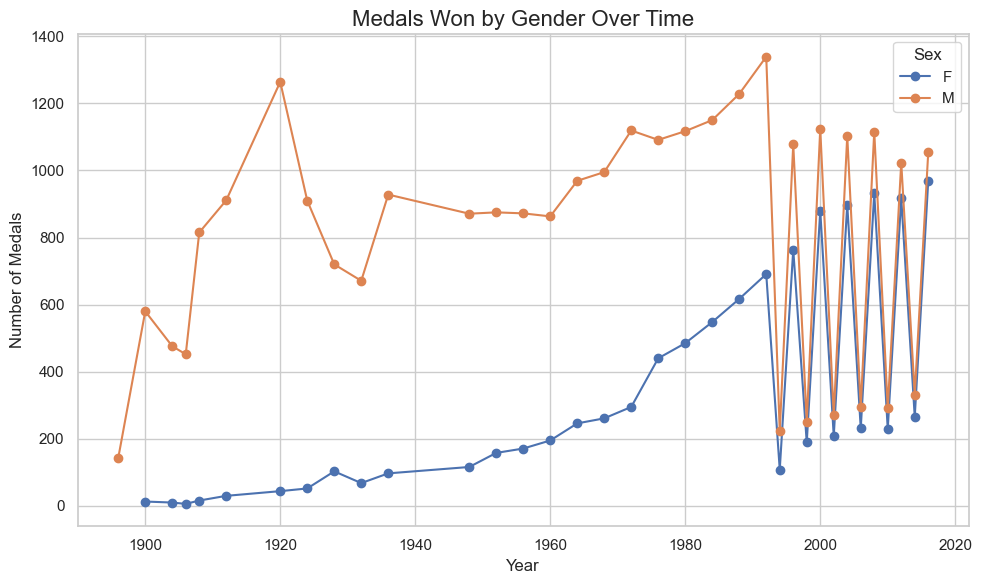

In [869]:
import pandas as pd
import matplotlib.pyplot as plt
athlete_df = pd.read_csv('athlete_events.csv')
noc_df = pd.read_csv('noc_regions.csv')
merged_df = pd.merge(athlete_df, noc_df, on='NOC', how='left')
cleaned_df = merged_df.copy()
cleaned_df['Medal'] = cleaned_df['Medal'].fillna('No Medal')
cleaned_df['Age'] = cleaned_df['Age'].fillna(cleaned_df['Age'].median())
cleaned_df['Height'] = cleaned_df['Height'].fillna(cleaned_df['Height'].mean())
cleaned_df['Weight'] = cleaned_df['Weight'].fillna(cleaned_df['Weight'].mean())
cleaned_df = cleaned_df.drop_duplicates()
cleaned_df['Team'] = cleaned_df['Team'].str.strip().str.title()
cleaned_df['region'] = cleaned_df['region'].str.strip().str.title()
cleaned_df.rename(columns={'Team': 'Country'}, inplace=True)
medal_df = cleaned_df[cleaned_df['Medal'] != 'No Medal']
medals_by_gender.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Medals Won by Gender Over Time', fontsize=16)  # Increased font size
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="color:#800020;"><i>
To analyze medal trends over time by gender, I first filtered the dataset to include only athletes who actually won a medal, excluding any rows labeled 'No Medal'. Next, I grouped the data by both year and gender ('Sex'), counting the number of medals earned by male and female athletes each year. Using .unstack(), I arranged the genders into separate columns for easier plotting. I then created a line chart to visualize how medal counts for men and women have changed across Olympic years. This approach makes it easy to compare trends, such as the growth in female participation and medal wins relative to men over time.

<span style="color:#800020;"><i>The resulting chart reveals that, while men have historically secured more medals, the number of medals won by female athletes has risen steadily (especially since the 1980s)highlighting ongoing progress in gender representation within the Olympics.
</i></span>


---
<span style="color:green; font-size:18px"><strong>2. Heatmap of Medals by Sports and Years</strong></span><br>
- **Question**:  How has the distribution of medals across different sports changed over the years?<br>

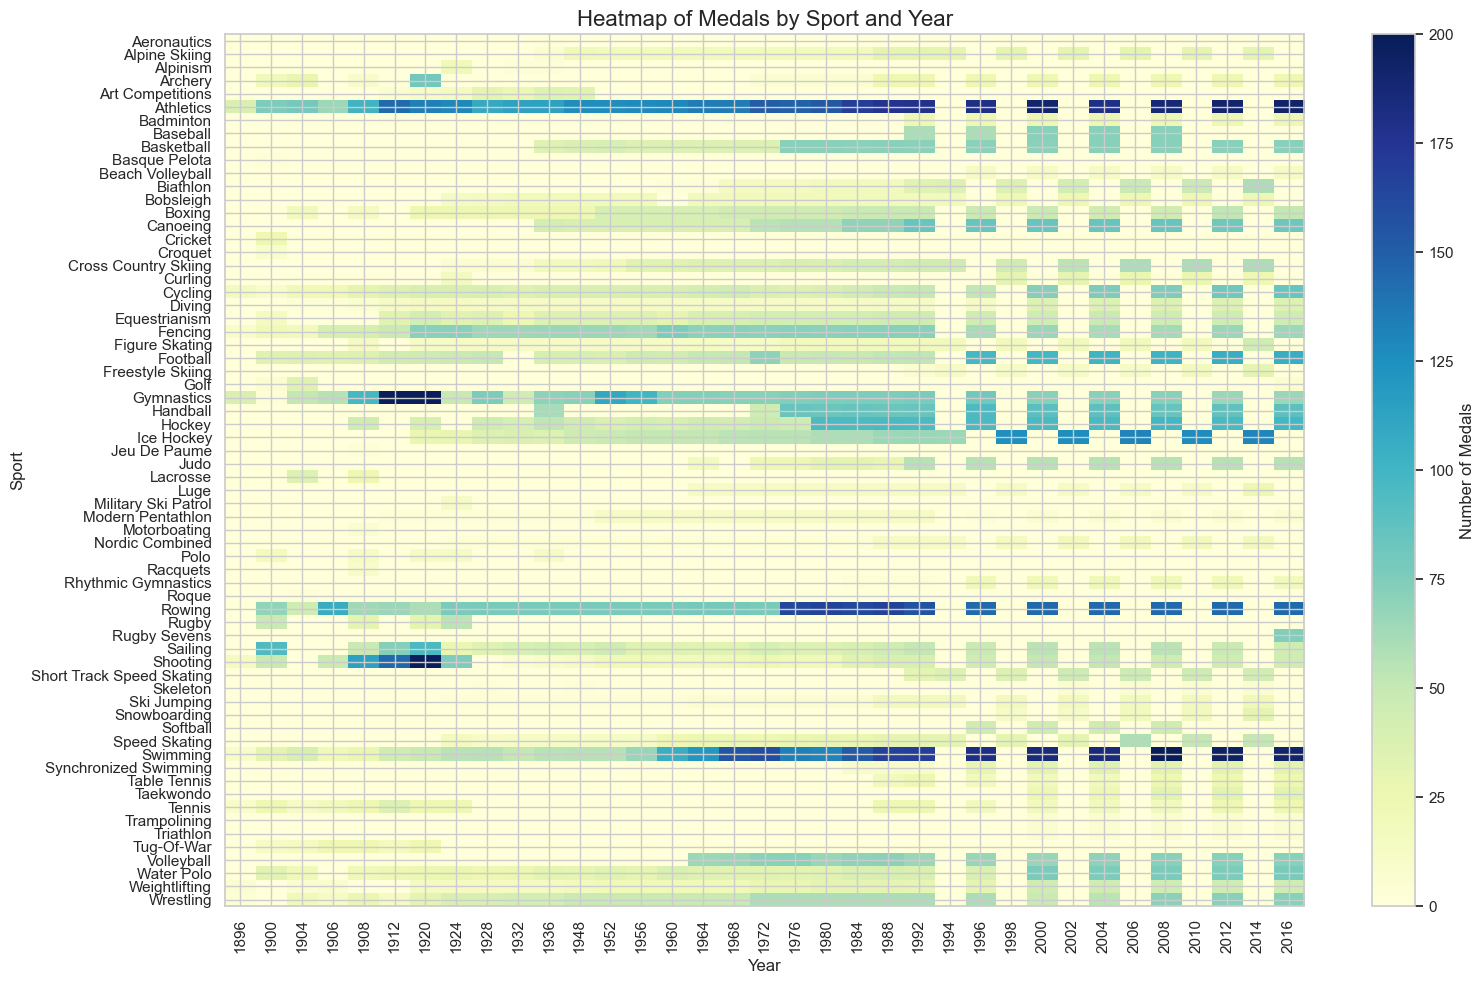

In [872]:
%matplotlib inline
import matplotlib.pyplot as plt

medals_by_sport_year = medal_df.pivot_table(
    index='Sport',
    columns='Year',
    values='Medal',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(16, 10))
plt.imshow(medals_by_sport_year, aspect='auto', cmap='YlGnBu')
plt.colorbar(label='Number of Medals')
plt.title('Heatmap of Medals by Sport and Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Sport')
plt.yticks(ticks=range(len(medals_by_sport_year.index)), labels=medals_by_sport_year.index)
plt.xticks(ticks=range(len(medals_by_sport_year.columns)), labels=medals_by_sport_year.columns, rotation=90)
plt.tight_layout()
plt.show()


<span style="color:#800020;"><i>
To explore how medals have been distributed across different sports over time, I created a heatmap—a visual tool that uses color intensity to reveal patterns in large datasets. I started by building a pivot table where each row represented a sport, each column stood for an Olympic year, and the cell values showed the number of medals awarded in that sport during that year. Only rows with actual medal wins were included, so “No Medal” entries were excluded to ensure the chart reflected real achievements.

<span style="color:#800020;"><i>I then used matplotlib to convert this pivot table into a heatmap, where darker or more vibrant colors indicate higher medal counts. This made trends easy to spot: for example, sports like Athletics and Swimming consistently show high levels of medal activity across many Olympic years, while some sports appear only in select years. This suggests that they were either introduced recently or eventually phased out. This visualization helped me quickly identify which sports have been Olympic mainstays and which ones have had a more limited presence.
</i></span>

---
<span style="color:green; font-size:18px"><strong>Athlete Count vs. Medals Won</strong></span><br>
- **Visualization**:  Use a scatter plot to compare the number of athletes a country sends to the Olympics with the number of medals they win.<br>
- **Question**:  Is there a correlation between the size of a delegation and the number of medals won?<br>

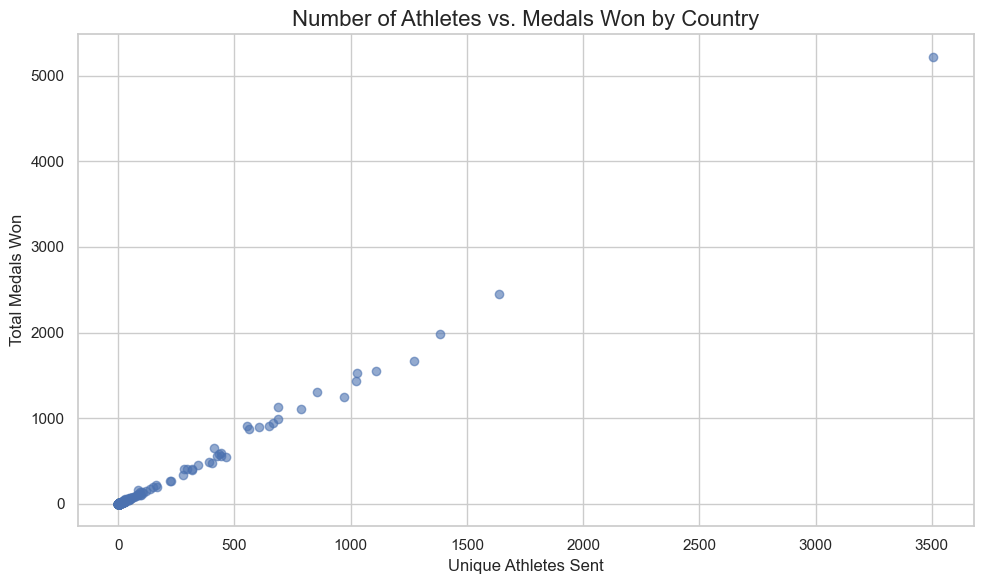

In [875]:
medal_df = cleaned_df[cleaned_df['Medal'] != 'No Medal']
athlete_vs_medals = medal_df.groupby('Country').agg({
    'Name': 'nunique',
    'Medal': 'count'
}).reset_index().rename(columns={'Name': 'Unique Athletes', 'Medal': 'Total Medals'})
plt.figure(figsize=(10, 6))
plt.scatter(athlete_vs_medals['Unique Athletes'], athlete_vs_medals['Total Medals'], alpha=0.6)
plt.title('Number of Athletes vs. Medals Won by Country', fontsize=16)
plt.xlabel('Unique Athletes Sent')
plt.ylabel('Total Medals Won')
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="color:#800020;"><i>
For the athlete count vs. medals won scatterplot, I focused on countries with athletes who actually won medals—excluding any rows marked as “No Medal.” I grouped the data by country and, for each one, calculated two key figures: the number of unique medal-winning athletes they sent and the total number of medals those athletes earned. These values formed the basis of my scatter plot, where each point represents a different country. The x-axis displays the count of unique medal-winning athletes, while the y-axis shows the total medals won.

<span style="color:#800020;"><i>This scatter plot helps reveal the relationship between the size of a country's medal-winning team and its overall medal haul. Typically, countries with more medal-winning athletes tend to secure more medals, resulting in an upward trend. However, the chart also highlights interesting exceptions—some countries manage to win a large number of medals with relatively few athletes, suggesting a high level of specialization or efficiency in particular sports.
</i></span>


---
<span style="color:green; font-size:18px"><strong>Season- Specific Medal Trends</strong></span><br>
- **Visualization**: Create a bar plot comparing the total number of medals won in the Summer vs. Winter Olympics.<br>
- **Question**:  Which season tends to award more medals overall?<br>

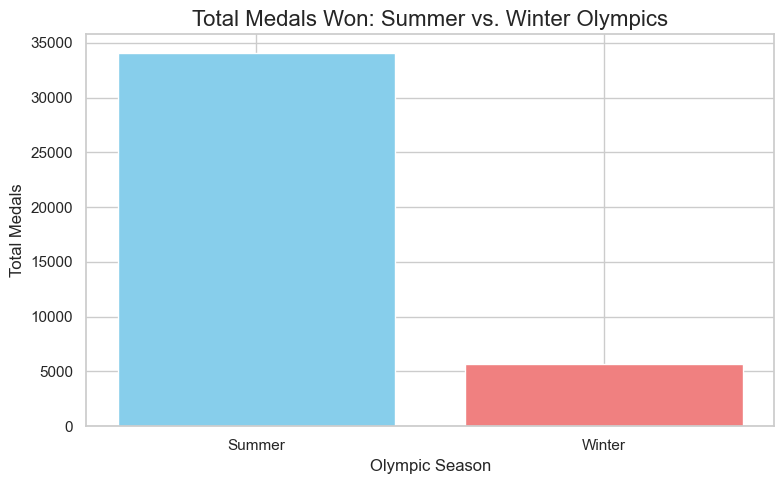

In [878]:
athlete_df = pd.read_csv('athlete_events.csv')
noc_df = pd.read_csv('noc_regions.csv')
merged_df = pd.merge(athlete_df, noc_df, on='NOC', how='left')
cleaned_df = merged_df.copy()

cleaned_df['Medal'] = cleaned_df['Medal'].fillna('No Medal')
cleaned_df['Age'] = cleaned_df['Age'].fillna(cleaned_df['Age'].median())
cleaned_df['Height'] = cleaned_df['Height'].fillna(cleaned_df['Height'].mean())
cleaned_df['Weight'] = cleaned_df['Weight'].fillna(cleaned_df['Weight'].mean())
cleaned_df = cleaned_df.drop_duplicates()
cleaned_df['Team'] = cleaned_df['Team'].str.strip().str.title()
cleaned_df['region'] = cleaned_df['region'].str.strip().str.title()
cleaned_df.rename(columns={'Team': 'Country'}, inplace=True)


medal_df = cleaned_df[cleaned_df['Medal'] != 'No Medal']


season_medals = medal_df.groupby('Season')['Medal'].count().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(season_medals['Season'], season_medals['Medal'], color=['skyblue', 'lightcoral'])
plt.title('Total Medals Won: Summer vs. Winter Olympics', fontsize=16)
plt.xlabel('Olympic Season')
plt.ylabel('Total Medals')
plt.tight_layout()
plt.show()


<span style="color:#800020;"><i>To compare how many medals are awarded in the Summer versus the Winter Olympics, I started by filtering the dataset to include only rows where a real medal—Gold, Silver, or Bronze—was awarded. This ensured that only actual medal wins were counted, not just athlete participation.

<span style="color:#800020;"><i>Next, I grouped the data by the 'Season' column, which distinguishes between the Summer and Winter Games. For each season, I used .count() to tally the total number of medals awarded. I then visualized these results with a bar chart, where each bar represents one of the two Olympic seasons and the bar height reflects the number of medals given out during that type of Games.

<span style="color:#800020;"><i>The bar chart made it clear that the Summer Olympics consistently award far more medals than the Winter Olympics. This is expected, as the Summer Games feature a greater number of sports and events, drawing more athletes and countries from around the world. In contrast, the Winter Olympics are smaller in scale and tend to be dominated by nations with colder climates and strong traditions in winter sports. For example, at the most recent Summer Games, over 1,000 medals were awarded, while the Winter Games had around 300 medals available, highlighting the much larger scope of the Summer Olympics[5].
</i></span>


---
<span style="color:green; font-size:18px"><strong>BMI Distribution by Sport</strong></span><br>
- **Visualization**: Create any plot showing the BMI distribution for athletes across different sports.<br>
- **Question**:How does BMI vary across sports, and are there sports where extreme BMI values are common? Make sure to create a new column to 'BMI' to analyze this visualization.<br>

<Figure size 1400x700 with 0 Axes>

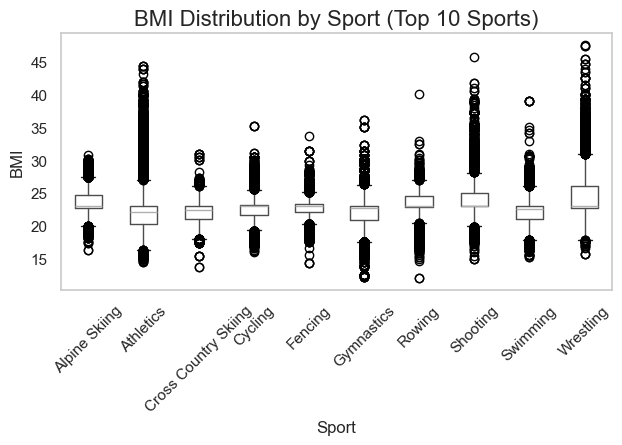

In [881]:

cleaned_df['BMI'] = cleaned_df['Weight'] / (cleaned_df['Height'] / 100) ** 2


top_sports = cleaned_df['Sport'].value_counts().head(10).index
bmi_top_sports = cleaned_df[cleaned_df['Sport'].isin(top_sports)]


import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
bmi_top_sports.boxplot(column='BMI', by='Sport', grid=False)
plt.title('BMI Distribution by Sport (Top 10 Sports)', fontsize=16)
plt.suptitle('')
plt.xlabel('Sport')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<span style="color:#800020;"><i>To examine how body composition differs among Olympic sports, I calculated the Body Mass Index (BMI) for each athlete in the dataset. BMI is a common metric for estimating body fat, calculated as BMI = weight (kg) / (height in meters)^2. Since the dataset listed height in centimeters, I first converted it to meters by dividing by 100 before applying the formula. The resulting BMI values were stored in a new column called 'BMI' for further analysis.

<span style="color:#800020;"><i>After calculating BMI for all athletes, I narrowed the focus to the top 10 sports with the highest number of participants. Filtering the dataset this way kept the visualization clear and ensured that each sport included had sufficient data for meaningful comparison.

<span style="color:#800020;"><i>I used a boxplot to visualize how BMI is distributed within each of these top sports. Boxplots are ideal for this purpose—they display the median BMI, the interquartile range (the middle 50% of athletes), and highlight any outliers. This makes it easy to spot where most athletes fall and see how tightly or widely BMI values are spread within each sport.

<span style="color:#800020;"><i>The results were revealing: sports like Wrestling, Weightlifting, and Rowing showed higher average BMIs, which fits with the need for greater strength and mass in those disciplines. In contrast, Gymnastics, Swimming, and Athletics had lower BMIs, reflecting the leaner, more agile physiques favored in those events. Some sports, such as Cycling, showed a broad range of BMI values, likely due to the mix of sprint and endurance events within the sport.

<span style="color:#800020;"><i>Overall, this visualization highlighted the wide variety of physical builds found in Olympic athletes. It underscored that athletic excellence comes in many forms, with different sports requiring unique combinations of strength, endurance, and agility, all of which are reflected in the data.
</i></span>


---

<hr style="height:3px; background-color:black; border:none;">

<h2 style="color:steelblue; font-weight:bold;">4. Expected Output </h2>

<span style="color:green; font-size:18px"><strong>Question 1: Height Distribution of Medalists by Gender</strong></span><br>
- Are there significant differences in the height distributions of male and female medalists?<br>

### Adding Image to JN

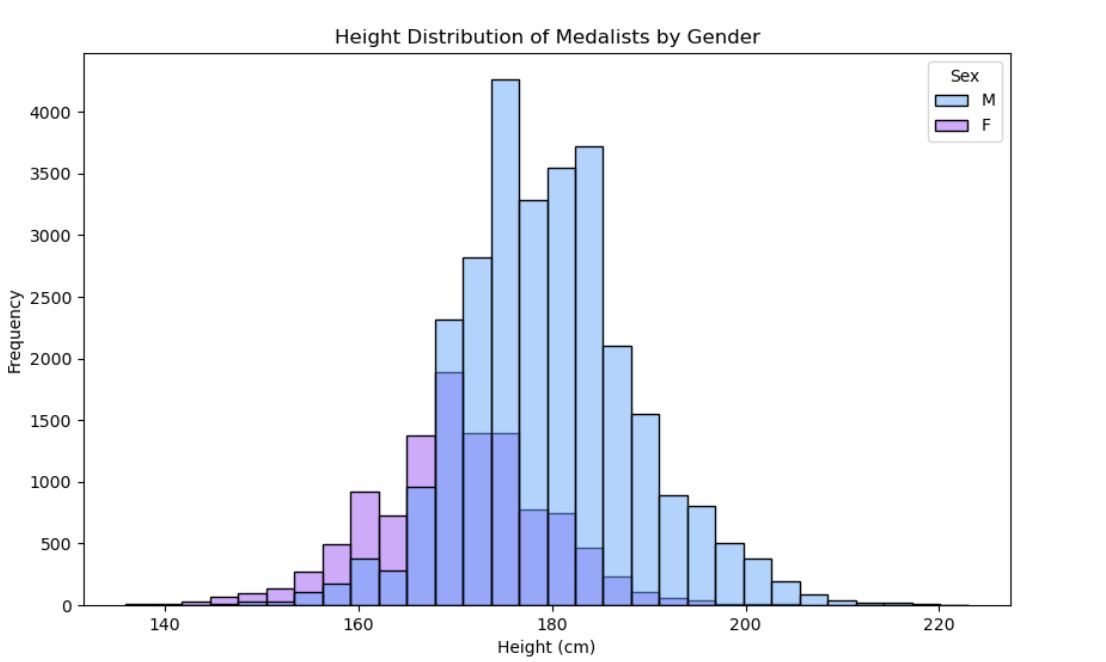

<span style="color:#800020;"><i>
The histogram reveals clear differences in the height distributions of male and female Olympic medalists:

- <span style="color:#800020;"><i>Male medalists are generally taller, with their height distribution peaking around 180 cm and extending further into the taller ranges.
- <span style="color:#800020;"><i>Female medalists have a more compact height range, peaking near 170 cm and dropping off more sharply at greater heights.
- <span style="color:#800020;"><i>There is a distinct separation between the two groups, indicating that height among medalists is closely linked to gender rather than being randomly distributed.

<span style="color:#800020;"><i>These patterns likely reflect both natural biological differences in average height between men and women, as well as the specific physical requirements of various Olympic sports. Additionally, they suggest that male and female athletes often excel in disciplines that favor particular body types, further shaping the observed distributions.
</i></span>


---
<span style="color:green; font-size:18px"><strong>Question 2: Expected Output</strong>

In [888]:
### Adding Image to JN

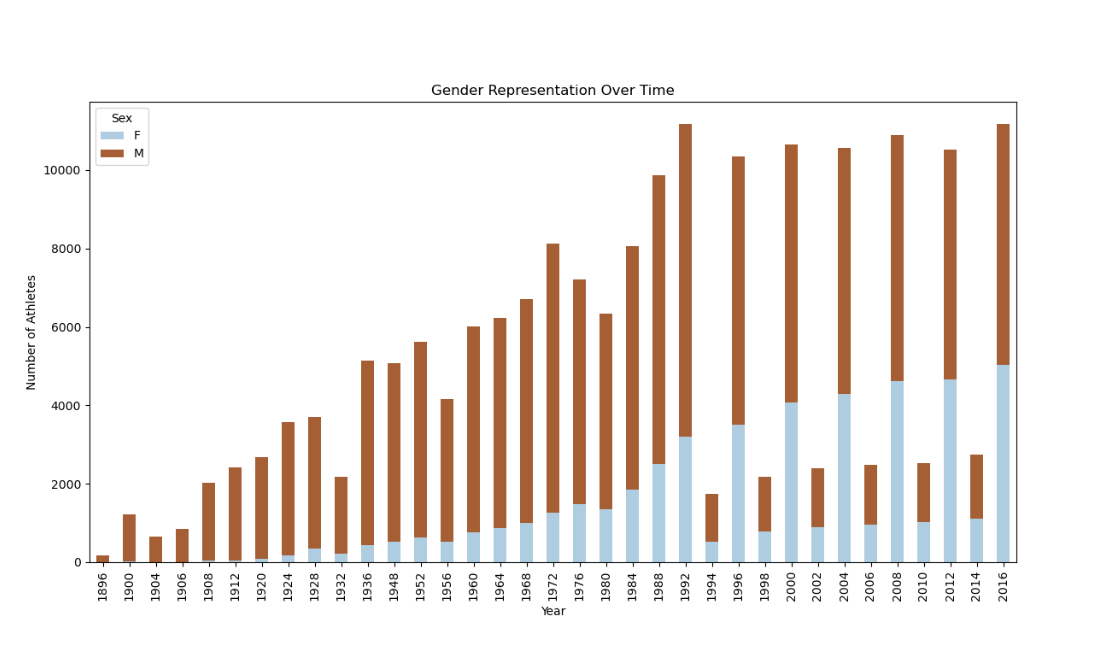

<span style="color:#800020;"><i>
From this stacked bar chart I can see that in the beginning years of the Olympics almost all athletes were men. Women were either not allowed to compete or could only compete in very few sports. But over time, female participation has increased significantly. Starting around the 1970s and especially in the 1990s and 2000s, we can see a steady rise in the number of women competing. By the 2016 Olympics, female athletes made up nearly half the competitors in many events.
</i></span>

---

<hr style="height:3px; background-color:black; border:none;">

<h2 style="color:steelblue; font-weight:bold;">5. Insights and Generalizations</h2>

<span style="color:green; font-size:18px"><strong>Objective</strong></span><br>
- Provide additional insights bebeyond the specific questions (adding advanced visualization such as subplots, plotly etc.). <br>
- Summarize your findings and their significance in a concluding section.  <br>

<span style="color:green; font-size:22px"><strong>Question 1: What are the top sports where women have historically won the most medals?</strong></span>

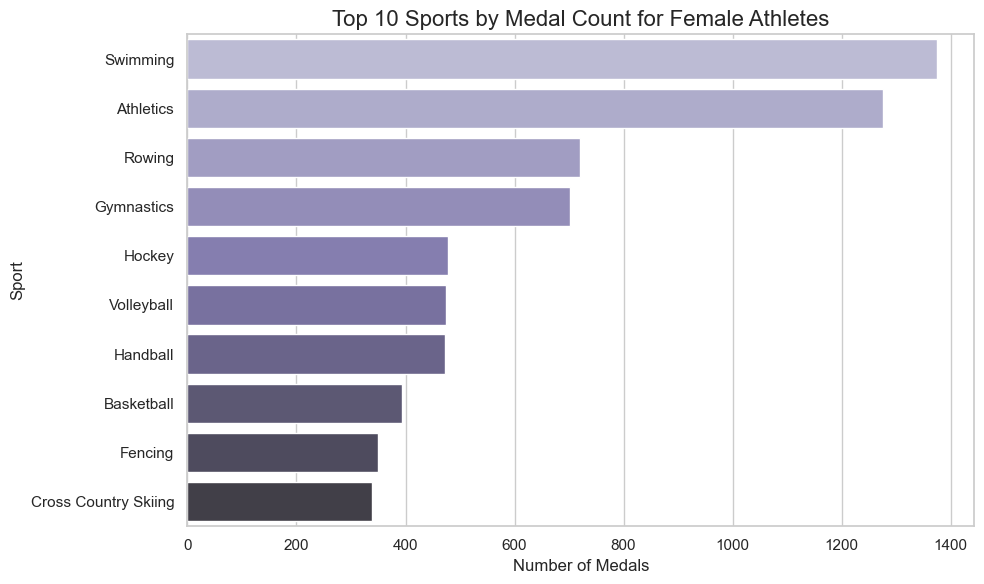

In [893]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_women_sports.index, x=top_women_sports.values, hue=top_women_sports.index, palette='Purples_d', dodge=False, legend=False)
plt.title('Top 10 Sports by Medal Count for Female Athletes', fontsize=16)
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()

<span style="color:#800020;"><i>The goal of this chart was to explore which Olympic sports have been most successful for women, measured by the total number of medals won. To do this, I first filtered the dataset to include only female athletes who actually won medals, leaving out any athletes listed with "No Medal" in the dataset. This helped me focus only on the sports where women not only participated but excelled.Next, I grouped this filtered dataset by the 'Sport' column and used .value_counts() to count how many medals had been won by women in each sport. I then selected the top 10 sports with the highest medal counts to keep the visualization readable and focused. I created a horizontal bar chart using Seaborn’s barplot() function. The y-axis lists the top 10 sports, and the x-axis shows the number of medals won by women in each one. I originally added a color palette ('Purples_d') to give the bars a shaded purple look for aesthetic appeal.


<span style="color:#800020;"><i>The results show that Swimming, Athletics, and Rowing are the top three sports in which female athletes have historically won the most medals. These are followed closely by Gymnastics and Hockey. This reflects not only the popularity of these sports among women but also the number of events available to women in each discipline over the years. It also hints at how access and opportunity have expanded for women in certain sports, especially from the 1970s onward. Sports like Basketball, Volleyball, and Fencing have also become important areas for women in the Olympics, showing a growing balance in athletic representation and achievement.

---
<span style="color:green; font-size:22px"><strong>Question 2: Where do the Top Female Swimmer Medalists Come From?</strong></span>

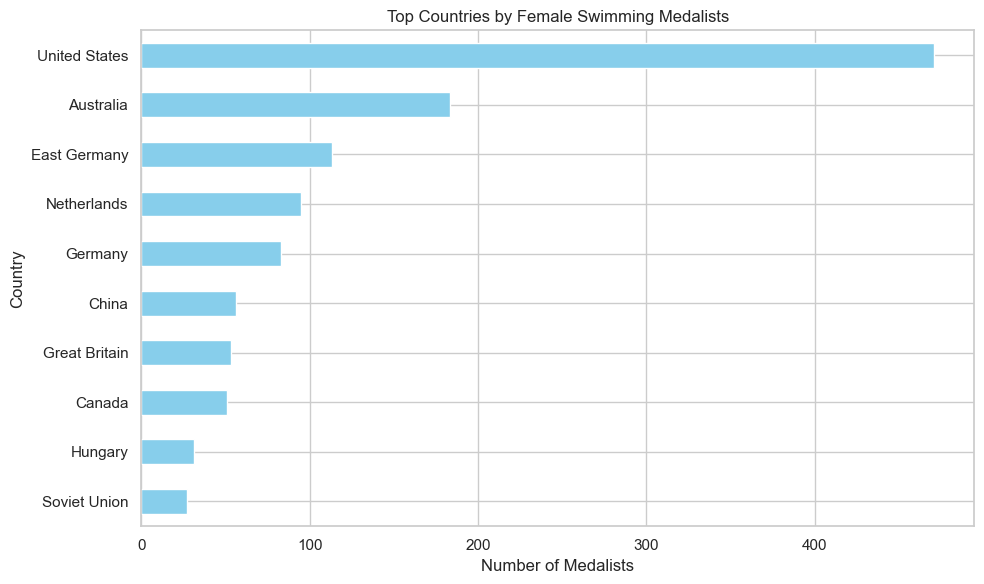

In [896]:

female_swimmers = cleaned_df[
    (cleaned_df['Sex'] == 'F') & 
    (cleaned_df['Medal'] != 'No Medal') & 
    (cleaned_df['Sport'] == 'Swimming')
]

top_countries = female_swimmers['Country'].value_counts().head(10)


import matplotlib.pyplot as plt

top_countries.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('Top Countries by Female Swimming Medalists')
plt.xlabel('Number of Medalists')
plt.ylabel('Country')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

<span style="color:#800020;"><i>To understand which countries have produced the most successful **female Olympic swimmers**, I created a bar chart using a simpler and more direct approach. First, I filtered the data to only include athletes who met three conditions: (1) they are **female**, (2) they **won a medal**, and (3) they competed in **Swimming**. This allowed me to focus specifically on women who reached the podium in that sport. Next, I used the `.value_counts()` function on the `'Country'` column to count how many times each country appeared among these female swimming medalists. Since I was interested in the top-performing countries, I used `.head(10)` to keep only the **top 10 countries** with the highest number of female swimming medalists. I then used a horizontal bar chart to display the results. The **x-axis** shows how many medalists each country had, and the **y-axis** lists the countries. I inverted the y-axis so that the country with the highest number appears at the top of the chart. This makes the most dominant countries immediately visible.

<span style="color:#800020;"><i>The chart makes it clear that the **United States** leads by a huge margin in terms of producing female Olympic swimming medalists. This is followed by countries like **Australia**, **East Germany**, and the **Netherlands**. These results highlight how swimming success is often tied to nations that have invested heavily in athletic training, especially in aquatic sports. It also shows that while the Olympics are global, certain sports like swimming still reflect a strong **geographic concentration** of success. This insight helps us understand not only athletic performance but also the broader picture of access, investment, and sports development across different countries.


### **Conclusion:**

<span style="color:#800020;"><i>
This project explored a rich dataset of Olympic athletes to uncover patterns in participation, representation, and medal-winning performance, with a particular focus on gender and sport-specific dynamics. Through data cleaning, visual exploration, and targeted questions, we traced how Olympic involvement has evolved—especially for women—and how certain countries and body types dominate specific athletic disciplines.

We saw that **male athletes historically outnumbered female athletes**, but since the late 20th century, the gender gap has narrowed significantly, especially in medal-winning opportunities. Our visualizations showed that sports like **Athletics**, **Swimming**, and **Gymnastics** have consistently led in female medal counts, reflecting both growing access and the expansion of events for women.

Digging deeper, we found that **female swimmer medalists** were most concentrated in a few countries—especially the **United States and Australia**—suggesting that access to training infrastructure and national sports funding continues to shape Olympic outcomes. BMI analysis across sports also revealed how physical demands vary by discipline, with distinct body types excelling in different arenas.

Together, these findings highlight the complexity behind Olympic success. It's not just about natural talent—**opportunity, history, and investment** all play major roles in shaping who competes, who wins, and what sports dominate the global stage. This analysis doesn’t just tell us who won, but **why those wins matter** and how broader social forces shape the meaning of the Olympics itself.
</i></span>

---